In [1]:
#
# Don't know Julia? Wish to feel that Just-in Time (JIT) compilation magic?
# Learn here: https://learnxinyminutes.com/docs/julia/
# https://github.com/dpsanders/scipy_2014_julia/
#

In [2]:
1+2

3

In [3]:
println("hey world")

hey world


In [4]:
# What is faster? R or Julia?
#
# Let's implement the Fibonnaci function
# Here's the Julia function using recursion: 

fib(n) = n < 2 ? n : fib(n - 1) + fib(n - 2)
# Time it: fib(27)
@elapsed fib(27)   # Approx. 6 milliseconds


0.004572064

In [5]:
#
# R code, equivalent recursive fuciton, commented out with `#=`, `=#`
#=  
fib <- function(n)
{
  ifelse(n < 2, n, fib(n - 1) + fib(n - 2))
}
 
start <- Sys.time()
fib(27)
end <- Sys.time()
print(end - start)  # approximately 4 seconds --->  R is over 650 times slower than Julia!
=#

In [6]:
Pkg.add("PyPlot")
using PyPlot

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
#
# From David Sanders: github.com/dpsanders/scipy_2014_julia/blob/master/fractal_example/fractals.ipynb
#
# Let's plot the "Julia Set" in Julia! (No, really, puns are still funny)

# Define function
function julia_set(z, c; maxiter=200)
    for n = 1:maxiter
        if abs2(z) > 4
            return n-1
        end
        z = z*z + c
    end
    return maxiter
end

julia_set (generic function with 1 method)

In [8]:
# we vary the 2nd argument to julia() in small amounts, resulting in chaotic structure
@time m = [ uint8(julia_set(complex(r,i), complex(-0.06,0.67))) for i=1:-0.002:-1, r=-1.5:0.002:1.5 ]

 in depwarn at deprecated.jl:73
 in uint8 at deprecated.jl:50
 [inlined code] from util.jl:155
 in anonymous at no file:154
 in include_string at loading.jl:266
 in execute_request at /Users/evanbiederstedt/.julia/v0.4/IJulia/src/execute_request.jl:164
 in eventloop at /Users/evanbiederstedt/.julia/v0.4/IJulia/src/IJulia.jl:138
 in anonymous at task.jl:447
while loading In[8], in expression starting on line 2


310.094690 seconds (93.30 M allocations: 899.061 GB, 13.25% gc time)


1001x1501 Array{UInt8,2}:
 0x01  0x01  0x01  0x01  0x01  0x01  …  0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01  …  0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01  …  0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01
 0x01  0x01  0x01  0x01  0x01  0x01     0x01  0x01  0x01  0x01  0x01  0x01

In [9]:
get_cmap("RdGy") #define color scheme

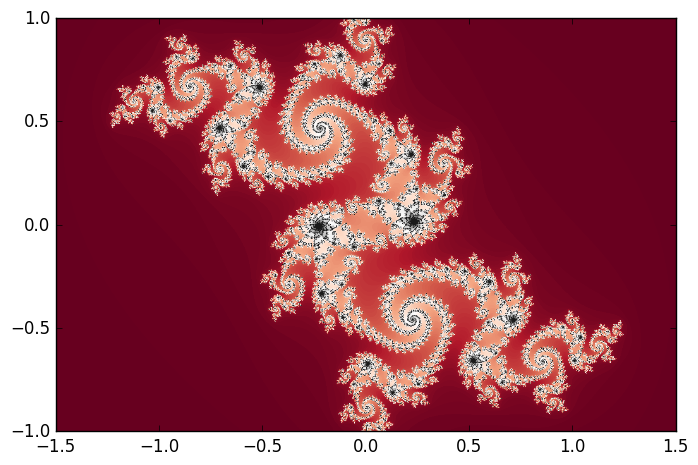

PyObject <matplotlib.image.AxesImage object at 0x30ccf1ad0>

In [10]:
imshow(m, cmap="RdGy", extent=[-1.5,1.5,-1,1])